### Project Title: Walmart Sales Forecasting
This project focuses on forecasting weekly sales for Walmart stores using a dataset that includes various features. The dataset comprises columns such as Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, and Unemployment. The goal is to utilize machine learning models to predict sales based on historical data, taking into account factors like holidays, weather conditions, and economic indicators, thereby enabling better inventory and sales strategies for Walmart.

In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")



In [2]:
# reading the dataset

df = pd.read_csv("Walmart_Store_sales.csv")
df.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
# checking the shape of the dataset

df.shape

(6435, 8)

In [4]:
# checking the datatypes of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# checking for null values in the dataset

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# checking for duplicate values in the dataset

df.duplicated().sum()

0

In [7]:
# describe the dataset

df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [8]:
# Converting Date column from object to datetime

df["Date"] = pd.to_datetime(df["Date"], dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


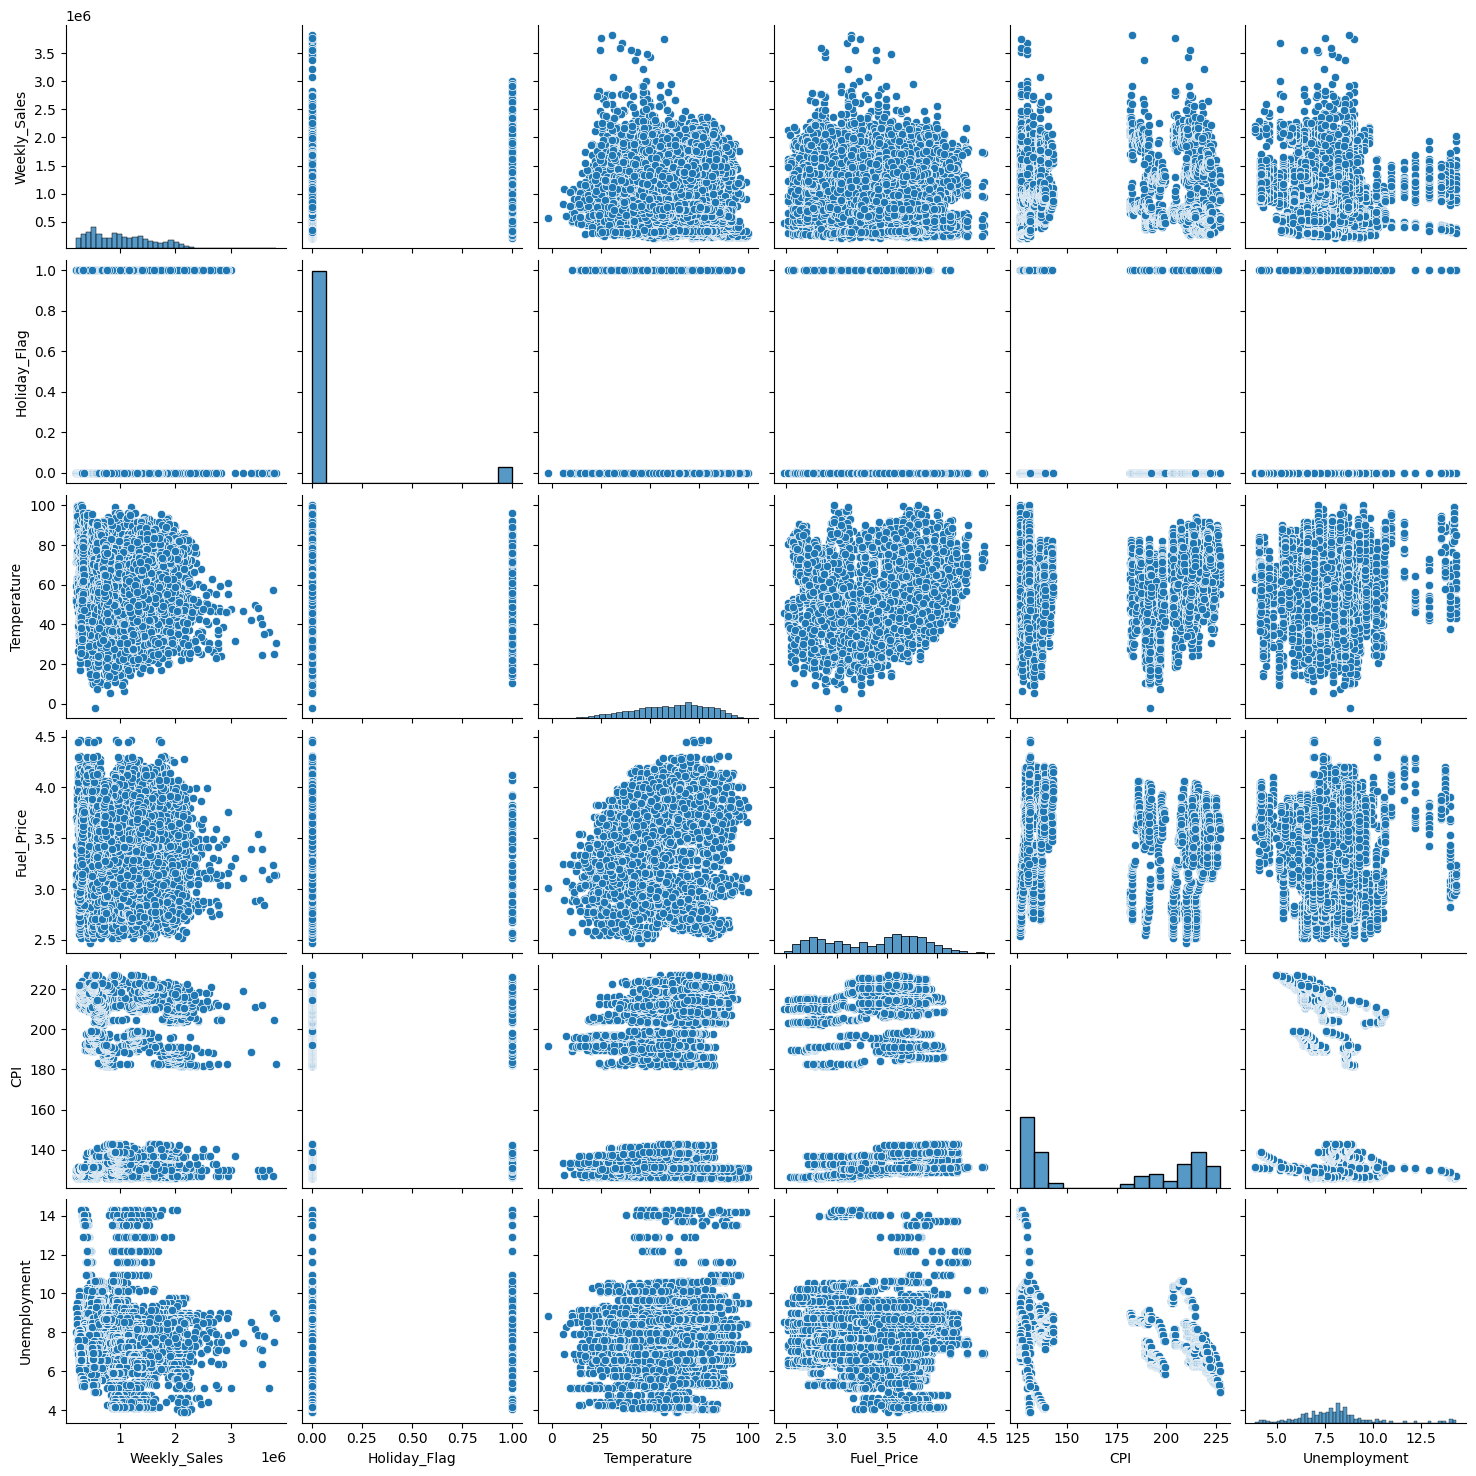

In [9]:
# Visualizing relationship using a pairplot

sns.pairplot(df[["Weekly_Sales", "Holiday_Flag", "Temperature",	"Fuel_Price", "CPI", "Unemployment"]])
plt.show()


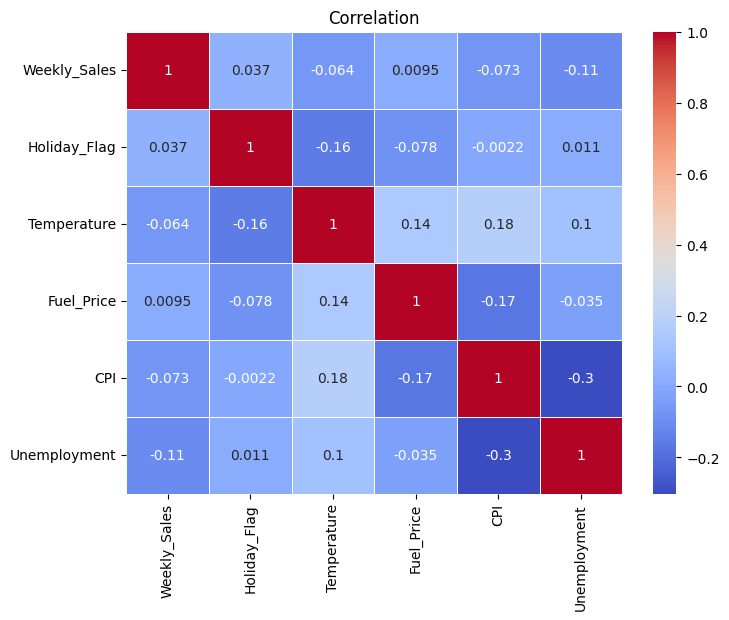

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Weekly_Sales", "Holiday_Flag", "Temperature",	"Fuel_Price", "CPI", "Unemployment"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation")
plt.show()

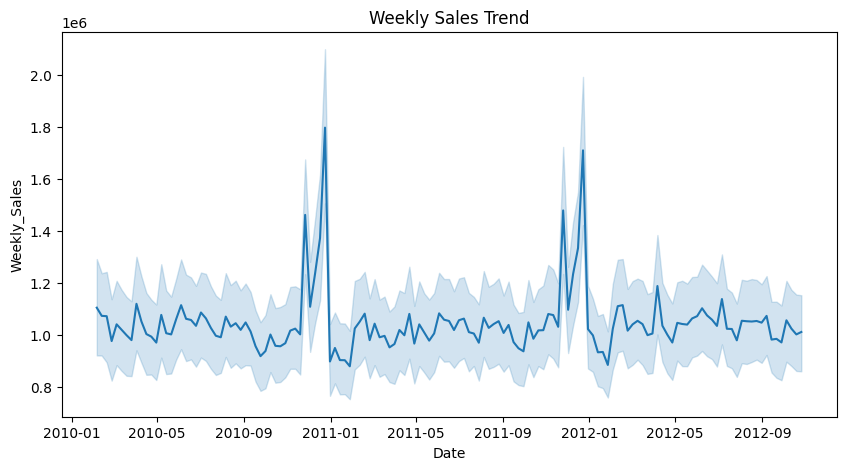

In [11]:
# visualizing the trend of the sales

plt.figure(figsize=(10,5))
sns.lineplot(x="Date",y="Weekly_Sales",data=df)
plt.title("Weekly Sales Trend")
plt.show()

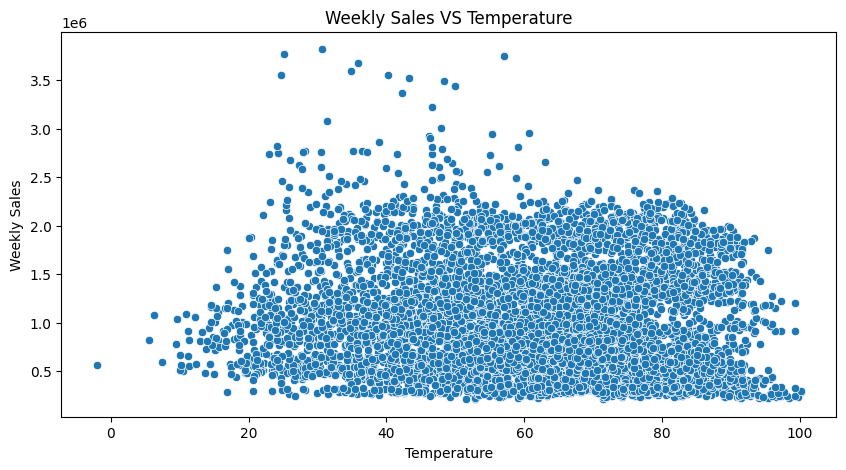

In [12]:
# scatter plot of "temperature" vs "weekly sales"
plt.figure(figsize=(10,5))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=df)
plt.title("Weekly Sales VS Temperature")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

In [13]:
df["month"] = df["Date"].dt.month
df["day_of_week"] = df["Date"].dt.dayofweek
df["year"] = df["Date"].dt.year
df.head(5)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  month  day_of_week  year  
0  211.096358         8.106      2            4  2010  
1  211.242170         8.106      2            4  2010  
2  211.289143         8.106      2            4  2010  
3  211.319643         8.106      2            4  2010  
4  211.350143         8.106      3            4  2010

In [14]:
df.drop(["Date", "Store"], axis=1, inplace=True)

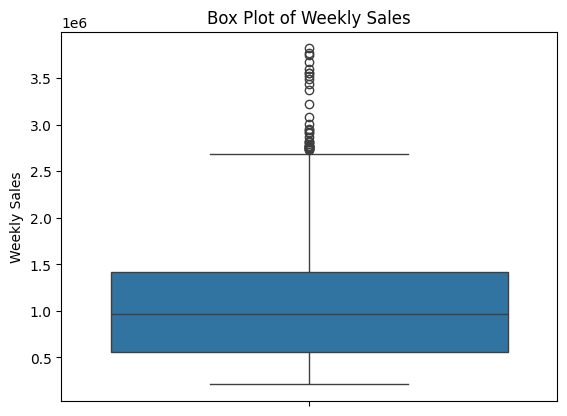

In [15]:
# Box plot for Weekly Sales

sns.boxplot(y="Weekly_Sales", data=df)
plt.title("Box Plot of Weekly Sales")
plt.ylabel("Weekly Sales")
plt.show()

### Removing Outliers using IQR method

In [16]:
q1_s = df["Weekly_Sales"].quantile(0.25)
q3_s = df["Weekly_Sales"].quantile(0.75)
q1_s, q3_s

(553350.105, 1420158.66)

In [17]:
IQR = q3_s - q1_s

In [18]:
min_rng = q1_s - (1.5*IQR)
max_rng = q3_s + (1.5*IQR)
min_rng, max_rng

(-746862.7275, 2720371.4924999997)

In [19]:
new_df = df[(df["Weekly_Sales"]>=min_rng) & (df["Weekly_Sales"]<=max_rng)]
new_df


Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0       1643690.90             0        42.31       2.572  211.096358   
1       1641957.44             1        38.51       2.548  211.242170   
2       1611968.17             0        39.93       2.514  211.289143   
3       1409727.59             0        46.63       2.561  211.319643   
4       1554806.68             0        46.50       2.625  211.350143   
...            ...           ...          ...         ...         ...   
6430     713173.95             0        64.88       3.997  192.013558   
6431     733455.07             0        64.89       3.985  192.170412   
6432     734464.36             0        54.47       4.000  192.327265   
6433     718125.53             0        56.47       3.969  192.330854   
6434     760281.43             0        58.85       3.882  192.308899   

      Unemployment  month  day_of_week  year  
0            8.106      2            4  2010  
1            8.106      2            4  2010  
2            8.106      2            4  2010  
3            8.106      2            4  2010  
4            8.106      3            4  2010  
...            ...    ...          ...   ...  
6430         8.684      9            4  2012  
6431         8.667     10            4  2012  
6432         8.667     10            4  2012  
6433         8.667     10            4  2012  
6434         8.667     10            4  2012  

[6401 rows x 9 columns]

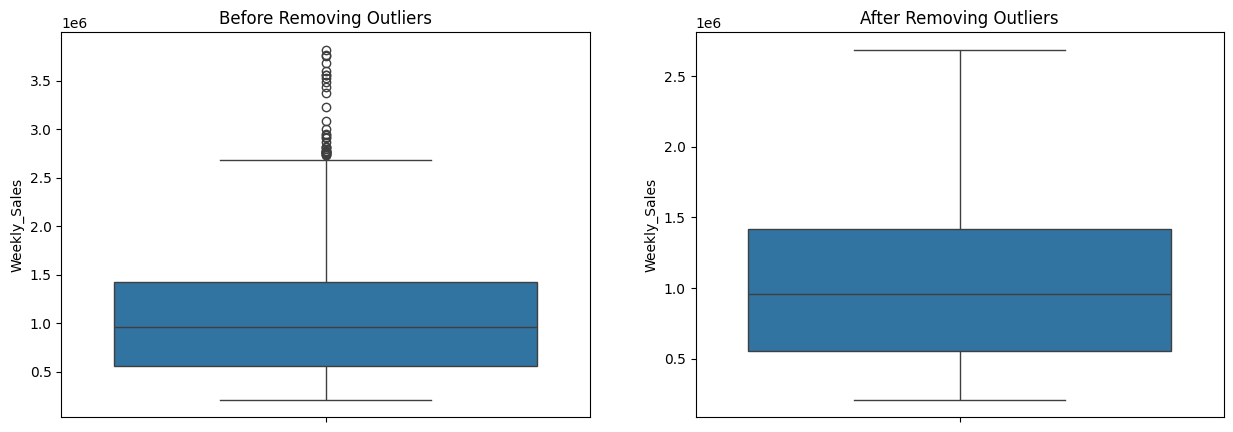

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Before Removing Outliers")
sns.boxplot(y="Weekly_Sales", data=df)


plt.subplot(1,2,2)
plt.title("After Removing Outliers")
sns.boxplot(y="Weekly_Sales", data=new_df)
plt.show()

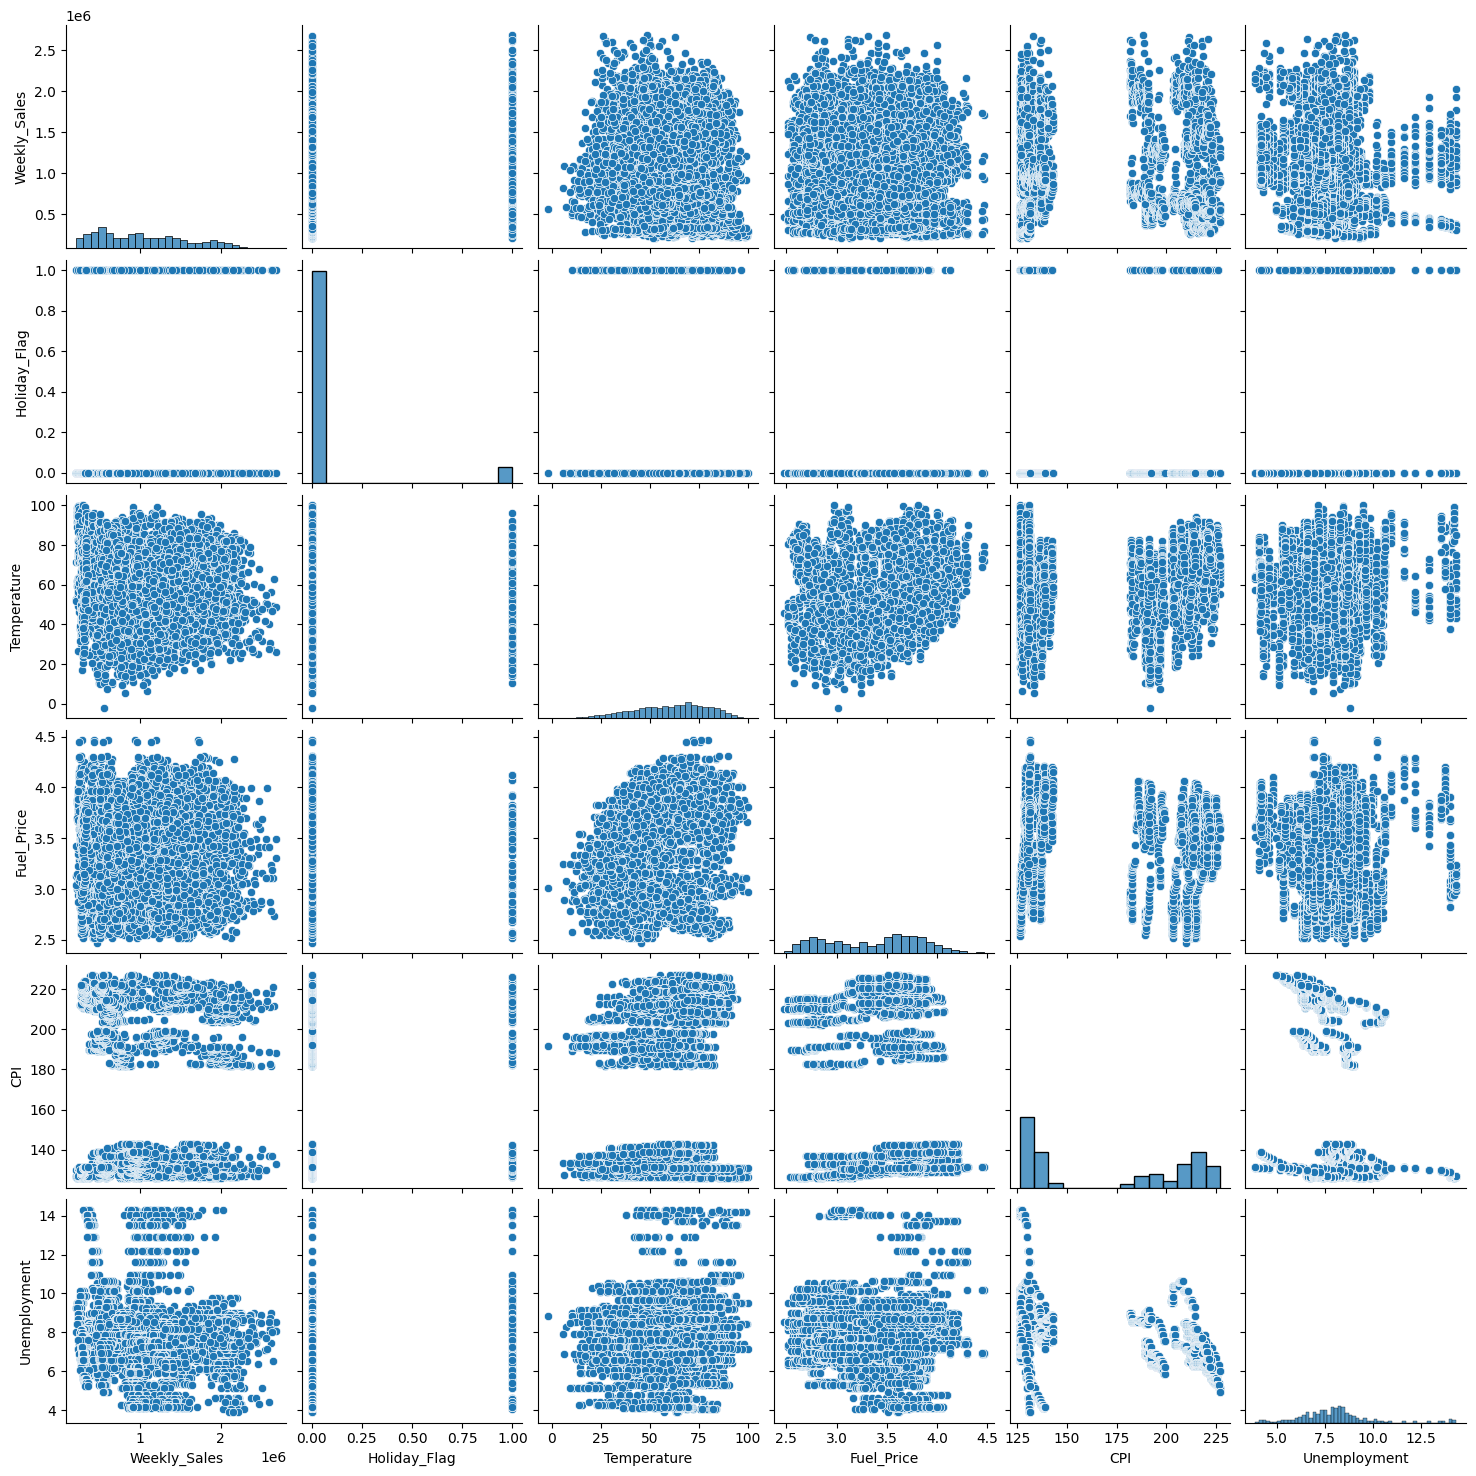

In [21]:
# Visualizing relationship after removing outliers

sns.pairplot(new_df[["Weekly_Sales", "Holiday_Flag", "Temperature",	"Fuel_Price", "CPI", "Unemployment"]])
plt.show()

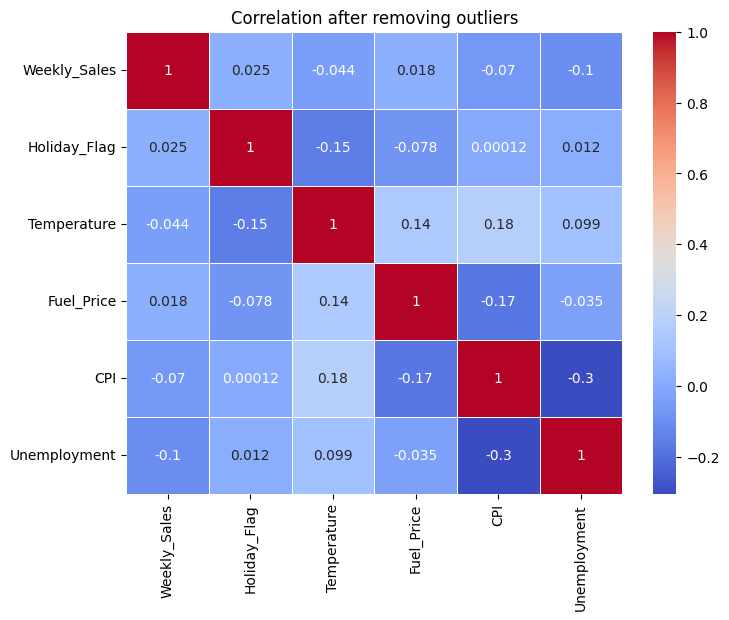

In [22]:
# Corelation after outlier removal

plt.figure(figsize=(8,6))
sns.heatmap(new_df[["Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation after removing outliers")
plt.show()

### Visualize Features VS Target Variable

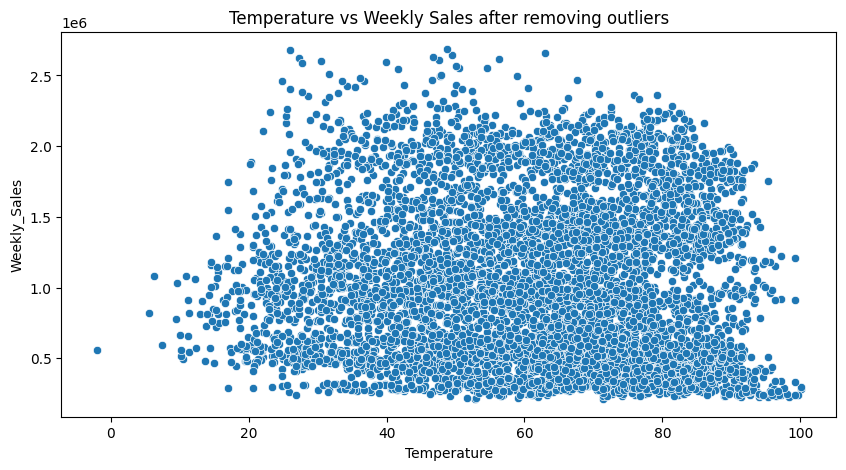

In [23]:
# Temperature VS Weekly Sales after removing outliers

plt.figure(figsize=(10,5))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=new_df)
plt.title("Temperature vs Weekly Sales after removing outliers")
plt.show()

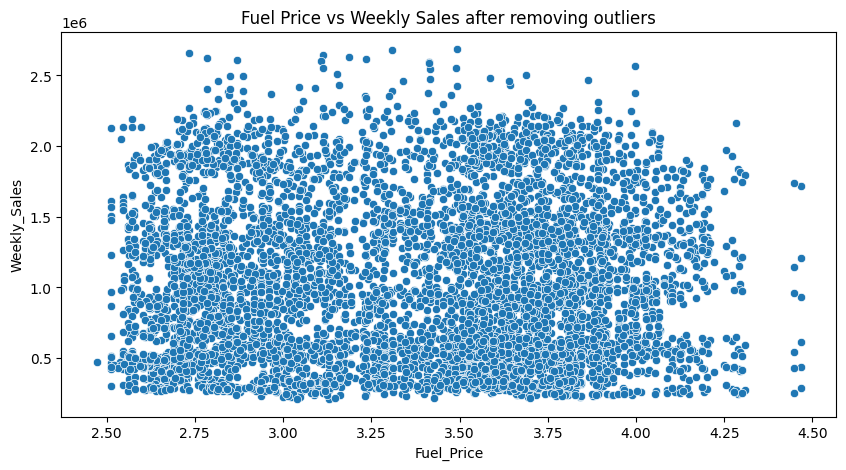

In [24]:
# Fuel Price vs Weekly Sales after removing outliers

plt.figure(figsize=(10,5))
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=new_df)
plt.title("Fuel Price vs Weekly Sales after removing outliers")
plt.show()

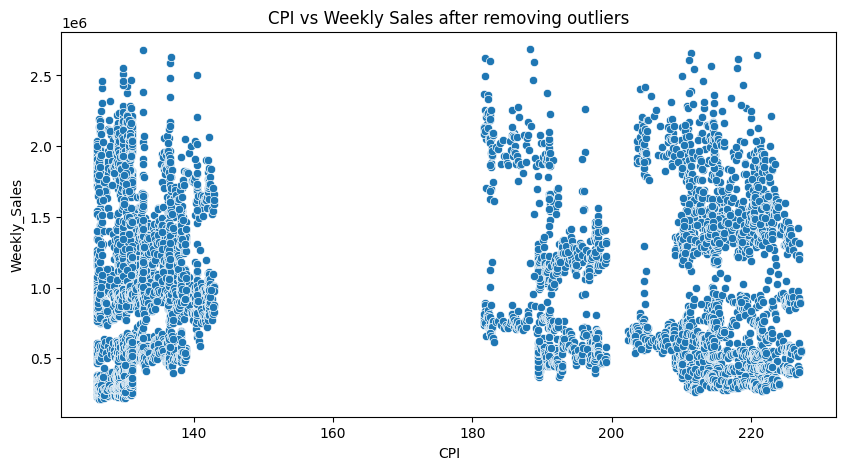

In [25]:
# CPI vs Weekly Sales after removing outliers

plt.figure(figsize=(10,5))
sns.scatterplot(x="CPI", y="Weekly_Sales", data= new_df)
plt.title("CPI vs Weekly Sales after removing outliers")
plt.show()

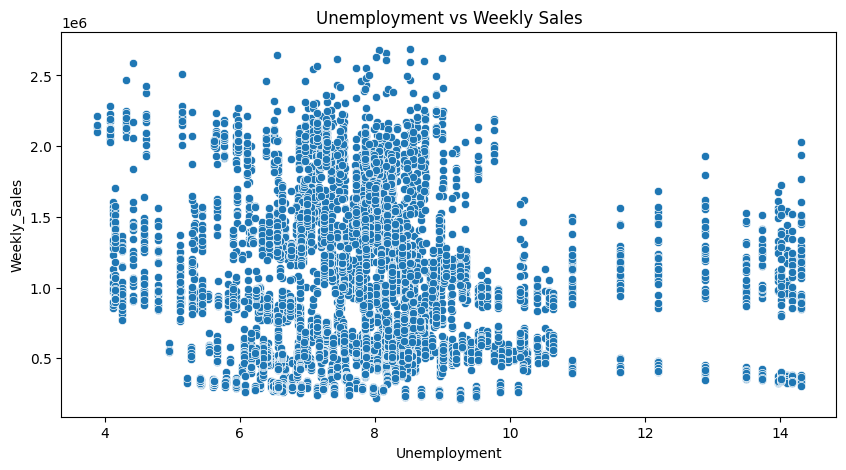

In [26]:
# Unemployment vs Weekly Sales after removing outliers

plt.figure(figsize=(10,5))
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=new_df)
plt.title("Unemployment vs Weekly Sales")
plt.show()

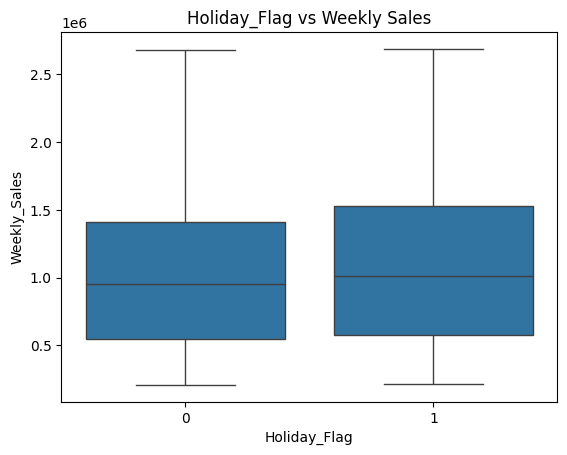

In [27]:
# Holiday_Flag vs Weekly Sales after removing outliers

sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", data=new_df)
plt.title("Holiday_Flag vs Weekly Sales")
plt.show()

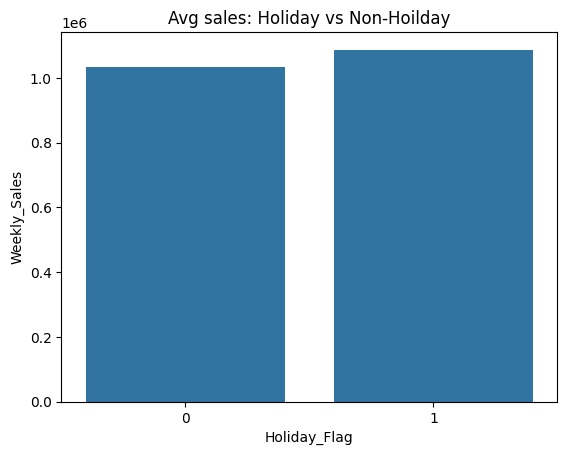

In [28]:
# Avg sales: Holiday vs Non-Hoilday

holiday_sales = new_df.groupby("Holiday_Flag")["Weekly_Sales"].mean().reset_index()
sns.barplot(x="Holiday_Flag", y="Weekly_Sales", data=holiday_sales)
plt.title("Avg sales: Holiday vs Non-Hoilday")
plt.show()

In [29]:
correlation = new_df.corr()
print(correlation["Weekly_Sales"].sort_values(ascending= True))


Unemployment   -0.104298
CPI            -0.069617
Temperature    -0.044340
year           -0.005401
Fuel_Price      0.018189
Holiday_Flag    0.025358
month           0.046662
Weekly_Sales    1.000000
day_of_week          NaN
Name: Weekly_Sales, dtype: float64


In [30]:
# Standardizing the data

ss= StandardScaler()
new_df[["Temperature", "Fuel_Price", "CPI",	"Unemployment", "month", "day_of_week", "year"]] = ss.fit_transform(new_df[["Temperature", "Fuel_Price", "CPI",	"Unemployment", "month", "day_of_week", "year"]])
new_df.head(5)

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
0    1643690.90             0    -1.002520   -1.713516  1.002474   
1    1641957.44             1    -1.208867   -1.765728  1.006179   
2    1611968.17             0    -1.131758   -1.839696  1.007372   
3    1409727.59             0    -0.767937   -1.737446  1.008147   
4    1554806.68             0    -0.774996   -1.598213  1.008922   

   Unemployment     month  day_of_week      year  
0      0.055203 -1.371053          0.0 -1.214154  
1      0.055203 -1.371053          0.0 -1.214154  
2      0.055203 -1.371053          0.0 -1.214154  
3      0.055203 -1.371053          0.0 -1.214154  
4      0.055203 -1.060823          0.0 -1.214154

In [31]:
new_df.corr()

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
Weekly_Sales      1.000000      0.025358    -0.044340    0.018189 -0.069617   
Holiday_Flag      0.025358      1.000000    -0.154556   -0.077808  0.000121   
Temperature      -0.044340     -0.154556     1.000000    0.143080  0.176510   
Fuel_Price        0.018189     -0.077808     0.143080    1.000000 -0.172078   
CPI              -0.069617      0.000121     0.176510   -0.172078  1.000000   
Unemployment     -0.104298      0.012385     0.099266   -0.035469 -0.304158   
month             0.046662      0.119601     0.248394   -0.038797  0.007620   
day_of_week            NaN           NaN          NaN         NaN       NaN   
year             -0.005401     -0.054836     0.060465    0.779444  0.074081   

              Unemployment     month  day_of_week      year  
Weekly_Sales     -0.104298  0.046662          NaN -0.005401  
Holiday_Flag      0.012385  0.119601          NaN -0.054836  
Temperature       0.099266  0.248394          NaN  0.060465  
Fuel_Price       -0.035469 -0.038797          NaN  0.779444  
CPI              -0.304158  0.007620          NaN  0.074081  
Unemployment      1.000000 -0.010091          NaN -0.242957  
month            -0.010091  1.000000          NaN -0.190219  
day_of_week            NaN       NaN          NaN       NaN  
year             -0.242957 -0.190219          NaN  1.000000

In [32]:
# splitting the data into x and y

x= new_df.iloc[:, 1:]
y= new_df.iloc[:, :1]
x

Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment     month  \
0                0    -1.002520   -1.713516  1.002474      0.055203 -1.371053   
1                1    -1.208867   -1.765728  1.006179      0.055203 -1.371053   
2                0    -1.131758   -1.839696  1.007372      0.055203 -1.371053   
3                0    -0.767937   -1.737446  1.008147      0.055203 -1.371053   
4                0    -0.774996   -1.598213  1.008922      0.055203 -1.060823   
...            ...          ...         ...       ...           ...       ...   
6430             0     0.223069    1.386604  0.517607      0.362886  0.800561   
6431             0     0.223612    1.360497  0.521592      0.353836  1.110791   
6432             0    -0.342212    1.393130  0.525578      0.353836  1.110791   
6433             0    -0.233608    1.325689  0.525669      0.353836  1.110791   
6434             0    -0.104370    1.136419  0.525111      0.353836  1.110791   

      day_of_week      year  
0             0.0 -1.214154  
1             0.0 -1.214154  
2             0.0 -1.214154  
3             0.0 -1.214154  
4             0.0 -1.214154  
...           ...       ...  
6430          0.0  1.294497  
6431          0.0  1.294497  
6432          0.0  1.294497  
6433          0.0  1.294497  
6434          0.0  1.294497  

[6401 rows x 8 columns]

In [33]:
y

Weekly_Sales
0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
...            ...
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43

[6401 rows x 1 columns]

In [34]:
# splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5120, 8), (1281, 8), (5120, 1), (1281, 1))

In [35]:
x_test

Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment     month  \
1388             0    -0.530639    0.255332 -1.051870     -0.243430 -1.681284   
4484             0    -1.407068   -0.764988  0.508824      0.434217 -1.681284   
5030             0     1.146198   -1.648250  0.977886      0.190413  0.180099   
1043             1    -0.526837   -1.358906  1.104398     -0.835373  1.421022   
132              0     1.307474    0.459831  1.280496     -0.582520  0.490330   
...            ...          ...         ...       ...           ...       ...   
514              0     0.459282    0.246630 -1.070308     -1.255376  0.800561   
2774             0    -1.153479    0.483762  0.903175     -0.350959 -1.060823   
4608             0     1.556176   -0.721477 -1.156008      0.794600  0.800561   
5533             1    -0.715264   -0.501750  1.183736     -0.152403  1.731252   
1744             0     0.845367   -1.108720 -1.157757     -0.027307  0.490330   

      day_of_week      year  
1388          0.0  1.294497  
4484          0.0  0.040171  
5030          0.0 -1.214154  
1043          0.0 -1.214154  
132           0.0  1.294497  
...           ...       ...  
514           0.0  0.040171  
2774          0.0  0.040171  
4608          0.0 -1.214154  
5533          0.0  0.040171  
1744          0.0 -1.214154  

[1281 rows x 8 columns]

In [36]:
y_test

Weekly_Sales
1388    1711562.73
4484    1006814.85
5030     432451.91
1043    1261693.16
132     1597868.05
...            ...
514     2031406.41
2774    1990932.77
4608     246277.18
5533    1537139.56
1744    1997397.63

[1281 rows x 1 columns]

In [37]:
# dictionary of models

models = {"DecisionTree": DecisionTreeRegressor(random_state=42),
         "RandomForest": RandomForestRegressor(random_state=42),
         "SVM": SVR(),
         "KNN": KNeighborsRegressor()
         }

In [38]:
# paramater grig for each model

param_grids = {"DecisionTree":{'reg__criterion':['squared_error', 'absolute_error', 'poisson'],
                               'reg__max_depth':[None,5,10,15],
                               'reg__min_samples_split':[2,5,10],
                               'reg__min_samples_leaf':[1,2,4]
             },
             "RandomForest":{'reg__n_estimators':[50,100,200,300],
                              'reg__max_depth':[None,5,10,15],
                              'reg__min_samples_split':[2,5,10],
                              'reg__min_samples_leaf':[1,2,4]
            },
            "SVM":{'reg__C':[0.1,1,10],
                   'reg__kernel':['linear', 'rbf', 'poly'],
                   'reg__gamma':['scale', 'auto'],
                   'reg__epsilon':[0.1,0.01,0.001,0.0001]
            },
            "KNN":{'reg__n_neighbors':[3,5,7],
                   'reg__weights':['uniform','distance'],
                   'reg__algorithm':['auto','ball_tree','kd_tree','brute']
            }
}


In [39]:
# Loop through each model and fit the pipeline with the model and the parameter grid

for model_name, model in models.items():
    pipeline = Pipeline([('reg', model)])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(x_train, y_train)

    print(f"Best parameters for {model_name}:{grid_search.best_params_}")
    print(f"Best score for {model_name}:{grid_search.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for DecisionTree:{'reg__criterion': 'poisson', 'reg__max_depth': 10, 'reg__min_samples_leaf': 4, 'reg__min_samples_split': 10}
Best score for DecisionTree:-243467631283.00958
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for RandomForest:{'reg__max_depth': 15, 'reg__min_samples_leaf': 4, 'reg__min_samples_split': 10, 'reg__n_estimators': 300}
Best score for RandomForest:-215342422157.7745
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for SVM:{'reg__C': 10, 'reg__epsilon': 0.0001, 'reg__gamma': 'scale', 'reg__kernel': 'rbf'}
Best score for SVM:-298064889592.2588
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN:{'reg__algorithm': 'brute', 'reg__n_neighbors': 7, 'reg__weights': 'uniform'}
Best score for KNN:-281449687620.3451


In [40]:

for model_name, model in models.items():
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test MSE for {model_name}: {mse}")
    print(f"Test R^2 for {model_name}: {r2}")

Test MSE for DecisionTree: 283563883432.55566
Test R^2 for DecisionTree: 0.107065690082358
Test MSE for RandomForest: 283563883432.55566
Test R^2 for RandomForest: 0.107065690082358
Test MSE for SVM: 283563883432.55566
Test R^2 for SVM: 0.107065690082358
Test MSE for KNN: 283563883432.55566
Test R^2 for KNN: 0.107065690082358


In [41]:
y_test.shape, y_pred.shape

((1281, 1), (1281, 1))

In [42]:
y_test[:5]

Weekly_Sales
1388    1711562.73
4484    1006814.85
5030     432451.91
1043    1261693.16
132     1597868.05

In [43]:
y_pred[:5]

array([[ 994336.23142857],
       [1180686.52285714],
       [ 719846.51571429],
       [1000341.03857143],
       [1128345.95285714]])

In [44]:
# checking for nan values

np.isnan(y_test).any()

Weekly_Sales    False
dtype: bool

In [45]:

np.isnan(y_pred).any()

False

In [46]:
# checking for inf values

np.isinf(y_test).any()

Weekly_Sales    False
dtype: bool

In [47]:
np.isinf(y_pred).any()

False

In [48]:
np.unique(y_pred)

array([ 292905.65      ,  396831.28142857,  452651.83714286, ...,
       2105359.12      , 2158112.60571429, 2163716.89428571])

In [49]:
# Flatten the arrays

y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

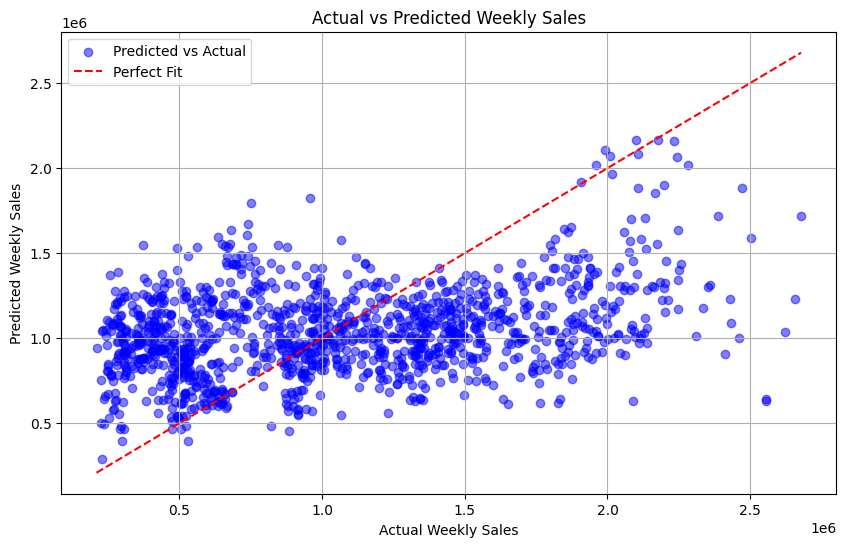

In [50]:
# Plot the predicted vs actual values

plt.figure(figsize=(10,6))

# Create scatterplot
plt.scatter(y_test_flat, y_pred_flat, alpha=0.5, color="blue", label="Predicted vs Actual")

# Line of equality for reference

min_val = min(min(y_test_flat), min(y_pred_flat))
max_val = max(max(y_test_flat), max(y_pred_flat))

plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label = "Perfect Fit")

# Titles and labels
plt.title("Actual vs Predicted Weekly Sales")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()



In [51]:
# Check min and max values

y_test_flat.min(), y_test_flat.max()

(209986.25, 2678206.42)

In [52]:
y_pred_flat.min(), y_pred_flat.max()

(292905.65, 2163716.894285714)

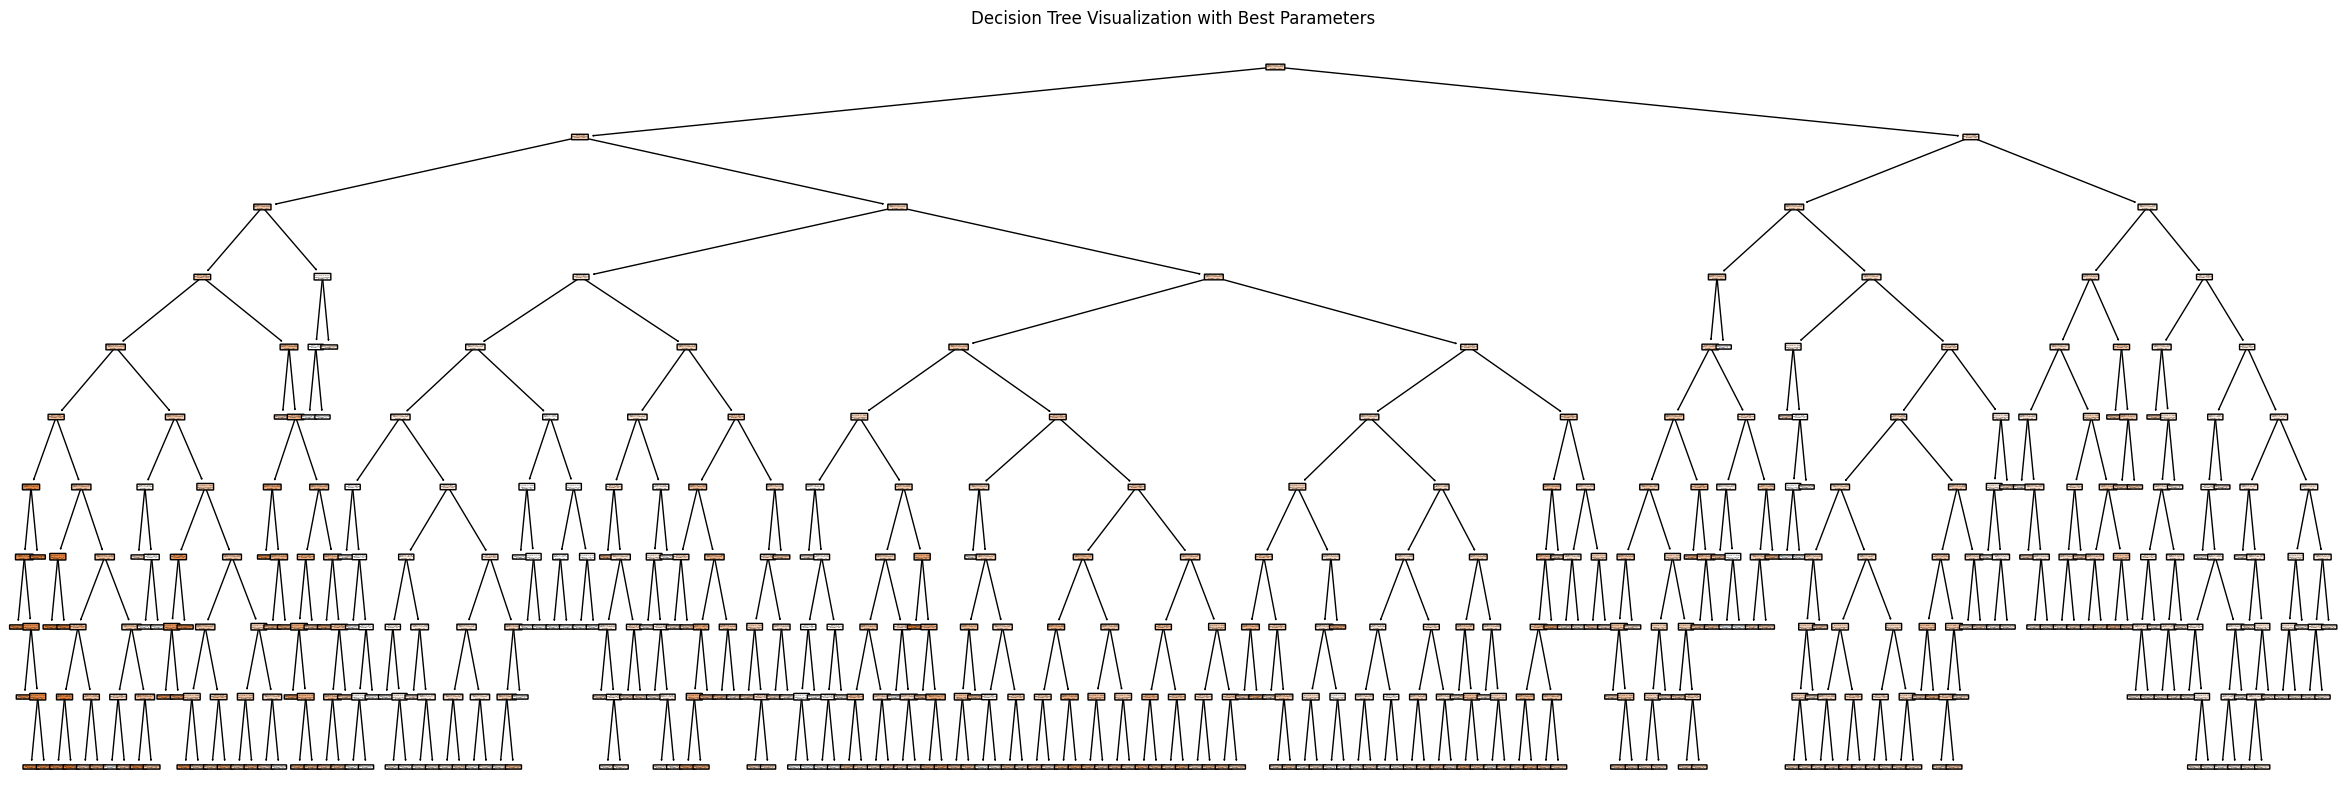

In [53]:
# Visualize the decision tree

best_params_dt = {'criterion': 'poisson', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

dt_model = DecisionTreeRegressor(**best_params_dt)
dt_model.fit(x_train, y_train)

plt.figure(figsize=(30,10))
plot_tree(dt_model, filled=True, feature_names=x_train.columns, rounded=True)
plt.title("Decision Tree Visualization with Best Parameters")
plt.show()

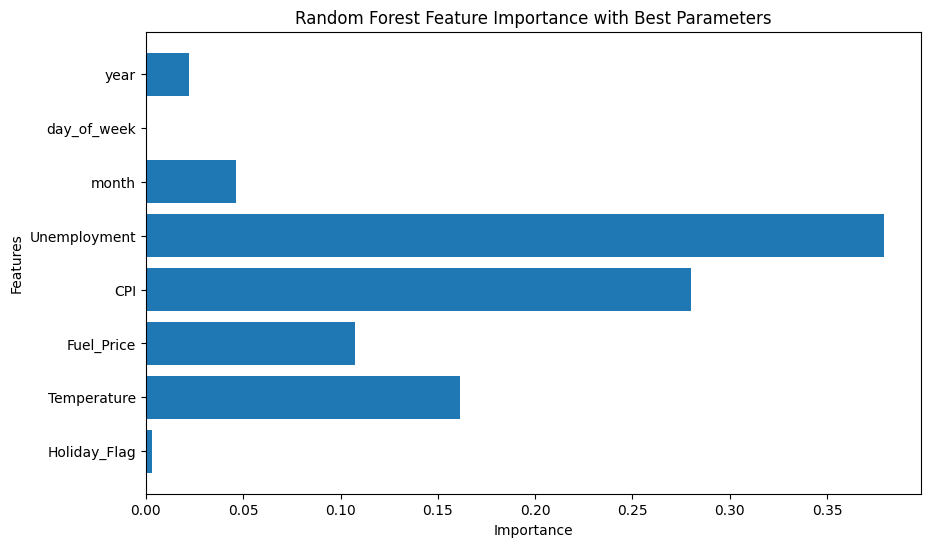

In [54]:

best_params_rf = {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

rf_model = RandomForestRegressor(**best_params_rf)
rf_model.fit(x_train, y_train)

# Feature importance
importance = rf_model.feature_importances_
feature_names = x_train.columns

# Visualize Feature Importance
plt.figure(figsize=(10,6))
plt.barh(feature_names, importance)
plt.title("Random Forest Feature Importance with Best Parameters")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

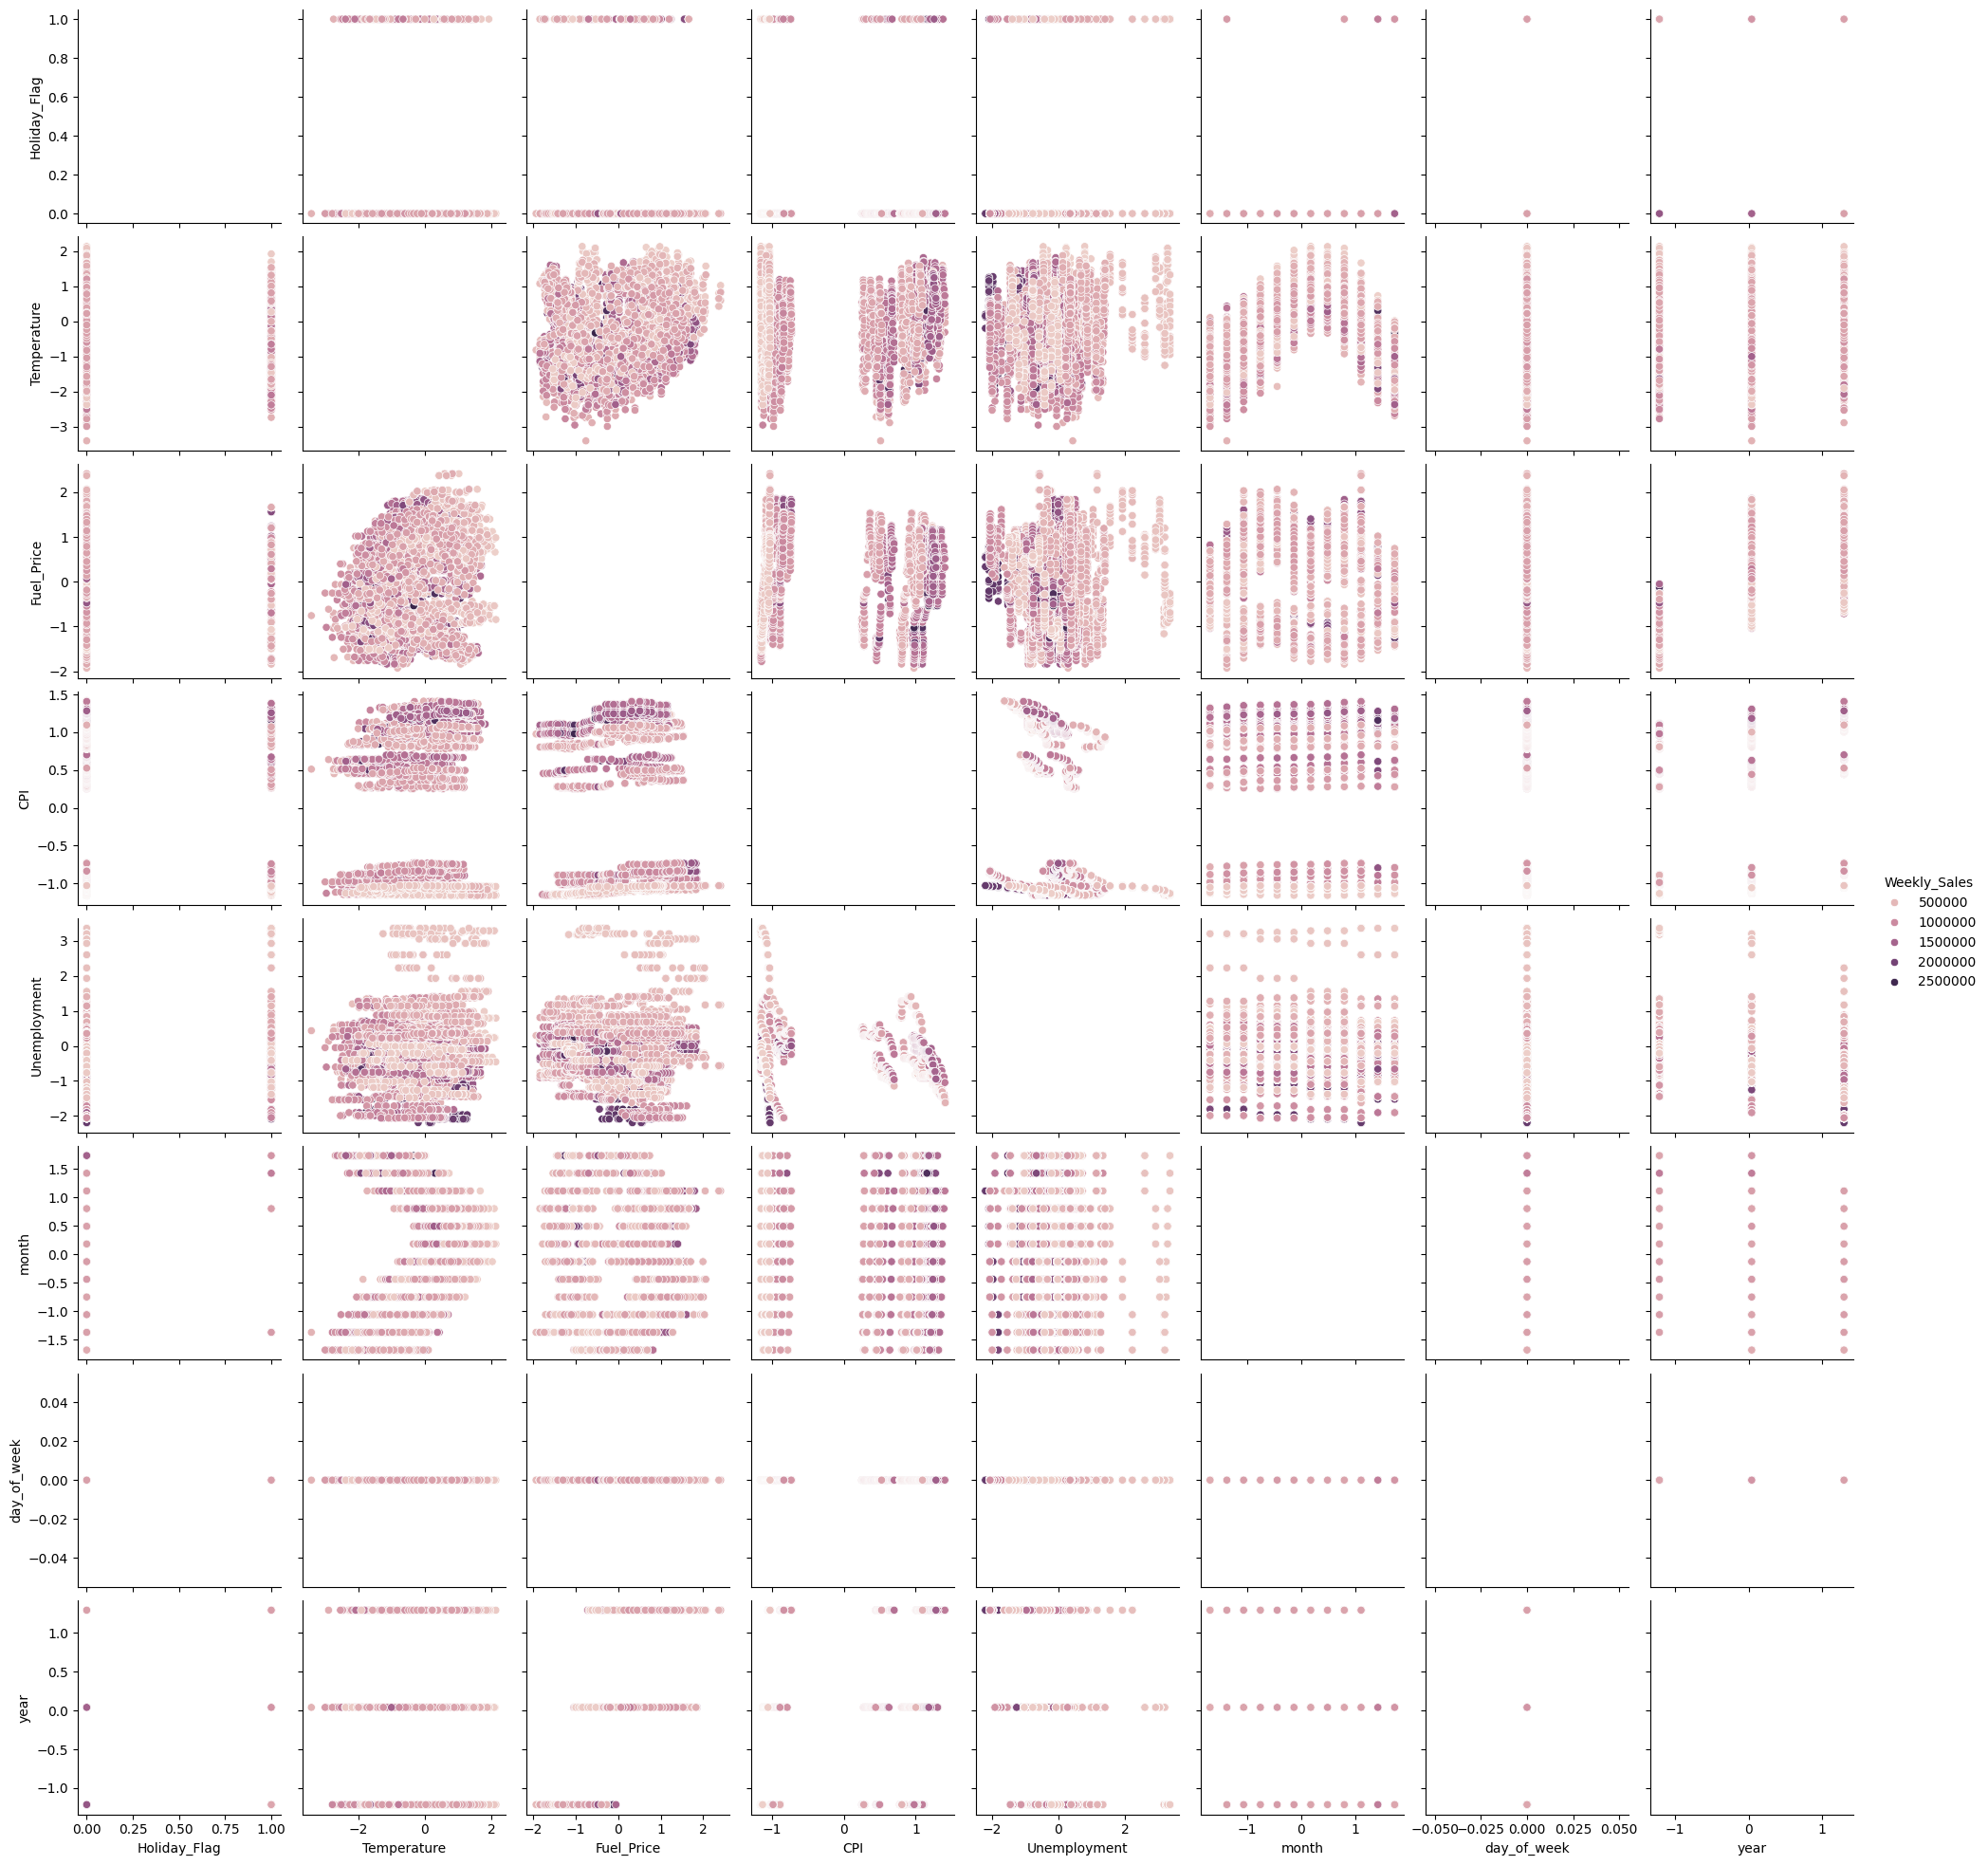

In [55]:
# visualizing data

sns.pairplot(new_df, hue="Weekly_Sales")
plt.show()

### Insights
The analysis of the Walmart dataset revealed that all models (Decision Tree, Random Forest, SVM, KNN) performed similarly, with mean squared errors around 283 billion and low R² scores of about 0.10. The main features affecting sales were Temperature, CPI, and Fuel Price. Tuning hyperparameters helped improve the Random Forest model's performance, and removing outliers increased accuracy.